In [33]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [34]:
X, y = make_moons(n_samples= 300, noise=3, random_state=42)

In [35]:
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df['Target'] = y

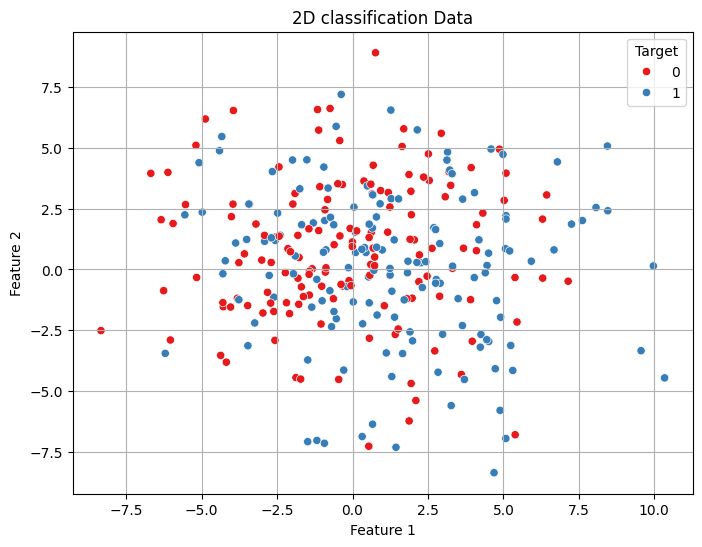

In [36]:
# visualize the data
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x= "Feature 1", y="Feature 2", hue="Target", palette="Set1")
plt.title("2D classification Data")
plt.grid(True)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# StandardScalar standardizes the features by removing the mean and scaling to unit variance
# This is important for distance-based algos to ensure all features contribute eqally to distance calculations
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_scaled , y, test_size=0.3, random_state=42, stratify=y)

# stratify = y maintains same class distribution in both training and test sets which is important for balanced evaluation

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
print(f"Test accuracy (k = 5) : {accuracy_score(y_test,y_pred):.2f}")

Test accuracy (k = 5) : 0.52


Cross-Validation to choose best K


In [39]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1,21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_scaled, y, cv = 5,scoring='accuracy')
    cv_scores.append(scores.mean())

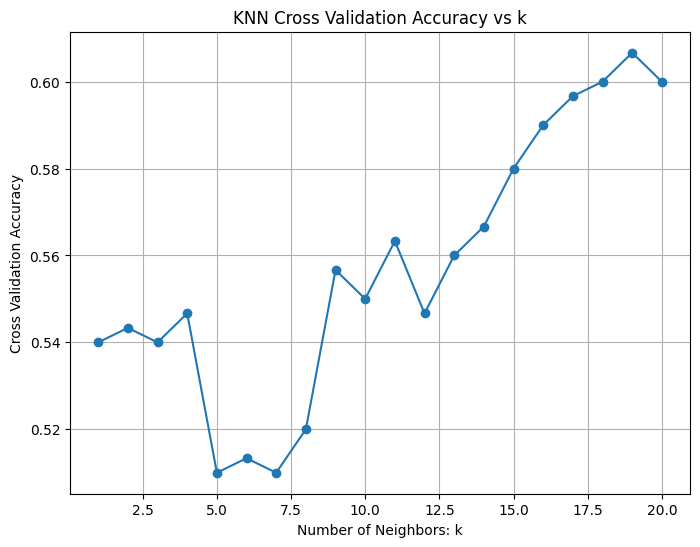

In [40]:
plt.figure(figsize=(8,6))
plt.plot(k_range, cv_scores, marker='o')
plt.title("KNN Cross Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross Validation Accuracy")
plt.grid(True)
plt.show()

In [41]:
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

Best k from cross-validation: 19


In [42]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(x_train, y_train)

y_pred = best_knn.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

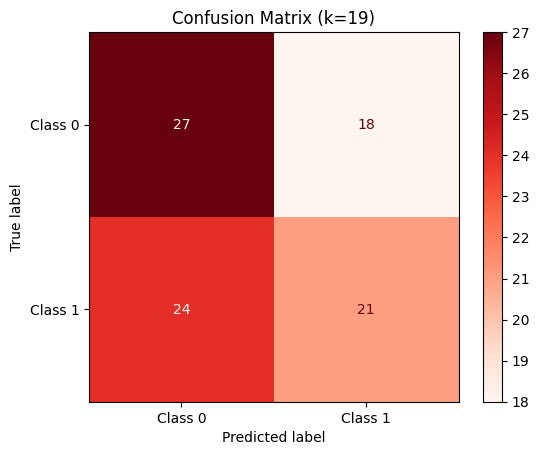

In [44]:
cm = confusion_matrix(y_test,y_pred)
display_knn = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
display_knn.plot(cmap="Reds")
plt.title(f"Confusion Matrix (k={best_k})")
plt.grid(False)
plt.show()

In [45]:
print("Classification Report:")
print(classification_report(y_test,y_pred, target_names=["Class 0", "Class 1"]))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.53      0.60      0.56        45
     Class 1       0.54      0.47      0.50        45

    accuracy                           0.53        90
   macro avg       0.53      0.53      0.53        90
weighted avg       0.53      0.53      0.53        90



Now, Let's Visualize Decision boundary with best K


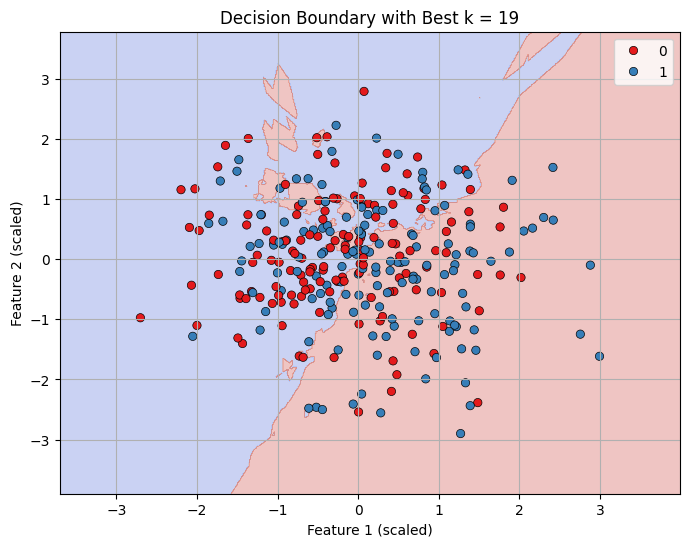

In [46]:
# Create meshgrid based on feature space
x_min, x_max = x_scaled[:, 0].min() - 1, x_scaled[:, 0].max() + 1
y_min, y_max = x_scaled[:, 1].min() - 1, x_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict over the meshgrid
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
sns.scatterplot(x=x_scaled[:, 0], y=x_scaled[:, 1], hue=y, palette="Set1", edgecolor='k')
plt.title(f"Decision Boundary with Best k = {best_k}")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.grid(True)
plt.show()